# Libraries Used

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from seaborn import heatmap

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Data Visualization

In [2]:
# view dataset as tabular form
dataset_link = "/content/drive/MyDrive/CSE422/Group14/StressLevelDataset_updated.csv"
student = pd.read_csv(dataset_link)
student

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,Bad,11,2.0,1,2,4.0,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,Good,15,5.0,3,1,4.0,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,Bad,14,2.0,1,2,2.0,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,Good,15,4.0,3,1,3.0,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,Bad,7,2.0,3,5,1.0,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,Bad,14,3.0,1,3,2.0,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,Good,8,0.0,3,0,0.0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,Bad,3,1.0,2,5,2.0,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,Bad,19,5.0,3,1,4.0,3,1,...,1,2,5,1,4,1,4,4,4,2


In [3]:
student.shape # rows = 1100 (data collected), columns = 21 (features=20,target=1)

(1100, 21)

In [4]:
student.keys() #columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [5]:
student.keys()

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [6]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   anxiety_level                 1100 non-null   int64  
 1   self_esteem                   1100 non-null   int64  
 2   mental_health_history         1100 non-null   object 
 3   depression                    1100 non-null   int64  
 4   headache                      1082 non-null   float64
 5   blood_pressure                1100 non-null   int64  
 6   sleep_quality                 1100 non-null   int64  
 7   breathing_problem             1094 non-null   float64
 8   noise_level                   1100 non-null   int64  
 9   living_conditions             1100 non-null   int64  
 10  safety                        1100 non-null   int64  
 11  basic_needs                   1100 non-null   int64  
 12  academic_performance          1100 non-null   int64  
 13  stu

In [7]:
student_null = student.isnull()
student_null

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1096,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1097,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1098,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

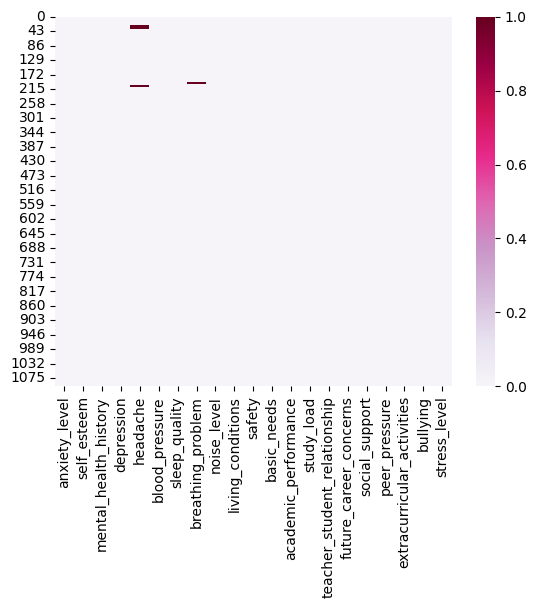

In [8]:
sns.heatmap(student_null, cmap = 'PuRd')

In [9]:
student.isnull().sum()

anxiety_level                    0
self_esteem                      0
mental_health_history            0
depression                       0
headache                        18
blood_pressure                   0
sleep_quality                    0
breathing_problem                6
noise_level                      0
living_conditions                0
safety                           0
basic_needs                      0
academic_performance             0
study_load                       0
teacher_student_relationship     0
future_career_concerns           0
social_support                   0
peer_pressure                    0
extracurricular_activities       0
bullying                         0
stress_level                     0
dtype: int64

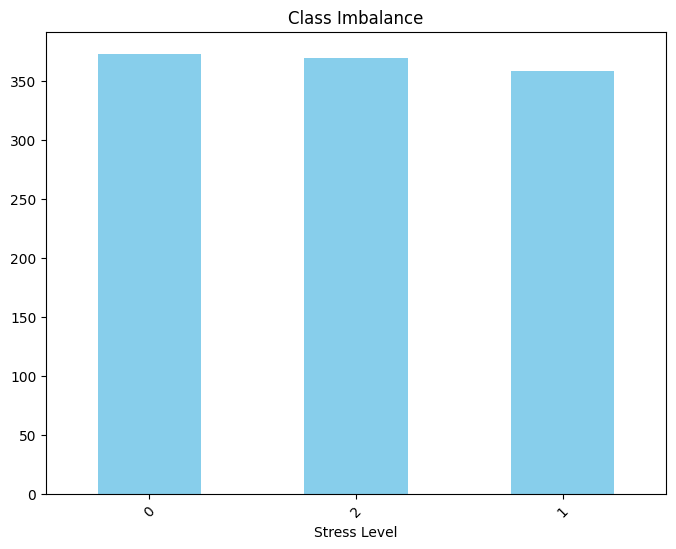

In [49]:
class_counts = student['stress_level'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Imbalance')
plt.xlabel('Stress Level')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing**

## 1. Imputing Missing Values

In [10]:
columnwise_high_corr_count= (student.isnull()).sum()
print(columnwise_high_corr_count)
filter_high_colmns_null = columnwise_high_corr_count[columnwise_high_corr_count>0].index
print(filter_high_colmns_null)

anxiety_level                    0
self_esteem                      0
mental_health_history            0
depression                       0
headache                        18
blood_pressure                   0
sleep_quality                    0
breathing_problem                6
noise_level                      0
living_conditions                0
safety                           0
basic_needs                      0
academic_performance             0
study_load                       0
teacher_student_relationship     0
future_career_concerns           0
social_support                   0
peer_pressure                    0
extracurricular_activities       0
bullying                         0
stress_level                     0
dtype: int64
Index(['headache', 'breathing_problem'], dtype='object')


In [11]:
process1 = filter_high_colmns_null[0]
process2 = filter_high_colmns_null[1]

In [12]:
impute = SimpleImputer(missing_values=np.nan, strategy="mean")
impute.fit(student[[process1]])
student[process1] = impute.transform(round(student[[process1]],1))
student

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,Bad,11,2.0,1,2,4.0,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,Good,15,5.0,3,1,4.0,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,Bad,14,2.0,1,2,2.0,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,Good,15,4.0,3,1,3.0,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,Bad,7,2.0,3,5,1.0,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,Bad,14,3.0,1,3,2.0,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,Good,8,0.0,3,0,0.0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,Bad,3,1.0,2,5,2.0,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,Bad,19,5.0,3,1,4.0,3,1,...,1,2,5,1,4,1,4,4,4,2


In [13]:
impute = SimpleImputer(missing_values=np.nan, strategy="mean")
impute.fit(student[[process2]])
student[process2] = impute.transform(round(student[[process2]],1))
student

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,Bad,11,2.0,1,2,4.0,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,Good,15,5.0,3,1,4.0,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,Bad,14,2.0,1,2,2.0,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,Good,15,4.0,3,1,3.0,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,Bad,7,2.0,3,5,1.0,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,Bad,14,3.0,1,3,2.0,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,Good,8,0.0,3,0,0.0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,Bad,3,1.0,2,5,2.0,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,Bad,19,5.0,3,1,4.0,3,1,...,1,2,5,1,4,1,4,4,4,2


In [14]:
columnwise_high_corr_count= (student.isnull()).sum()
print(columnwise_high_corr_count)
filter_high_colmns_null = columnwise_high_corr_count[columnwise_high_corr_count>0].index
print(filter_high_colmns_null)

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64
Index([], dtype='object')


In [15]:
student['mental_health_history'].unique()

array(['Bad', 'Good'], dtype=object)

In [16]:
# mental_health_history_enc = pd.get_dummies(student['mental_health_history'])
# student

In [17]:
enc = LabelEncoder()

student['mental_health_history'] = enc.fit_transform(student['mental_health_history'])


student

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2.0,1,2,4.0,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5.0,3,1,4.0,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,0,14,2.0,1,2,2.0,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4.0,3,1,3.0,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2.0,3,5,1.0,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3.0,1,3,2.0,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,1,8,0.0,3,0,0.0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1.0,2,5,2.0,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,0,19,5.0,3,1,4.0,3,1,...,1,2,5,1,4,1,4,4,4,2


In [18]:
student.drop(['mental_health_history'], inplace=True, axis=1)

In [19]:
student_corr = student.corr()
student_corr

,anxiety_level,self_esteem,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
anxiety_level,1.000000,-0.672745,0.694340,0.624838,0.330867,-0.710292,0.556842,0.608624,-0.568434,-0.651220,-0.637079,-0.649601,0.586064,-0.663176,0.717016,-0.569748,0.642910,0.641022,0.709982,0.736795
self_esteem,-0.672745,1.000000,-0.699602,-0.617504,-0.514692,0.662693,-0.508763,-0.571169,0.550535,0.643981,0.631212,0.639045,-0.575112,0.652934,-0.712520,0.679211,-0.607118,-0.641202,-0.640737,-0.756195
depression,0.694340,-0.699602,1.000000,0.652850,0.436084,-0.693161,0.522055,0.566250,-0.530351,-0.625857,-0.608776,-0.633174,0.602498,-0.673853,0.706561,-0.617972,0.635544,0.648551,0.665790,0.734379
headache,0.624838,-0.617504,0.652850,1.000000,0.354076,-0.631859,0.459174,0.543345,-0.526482,-0.581894,-0.618393,-0.617337,0.544988,-0.622669,0.671295,-0.566613,0.616366,0.579510,0.607461,0.709190
blood_pressure,0.330867,-0.514692,0.436084,0.354076,1.000000,-0.300323,0.162756,0.352744,-0.274686,-0.288354,-0.280590,-0.262785,0.348964,-0.352123,0.434087,-0.752531,0.401392,0.426254,0.370440,0.394200
sleep_quality,-0.710292,0.662693,-0.693161,-0.631859,-0.300323,1.000000,-0.537351,-0.576645,0.535462,0.657686,0.620955,0.671326,-0.551775,0.677569,-0.682130,0.554553,-0.649098,-0.623092,-0.699427,-0.749068
breathing_problem,0.556842,-0.508763,0.522055,0.459174,0.162756,-0.537351,1.000000,0.458266,-0.450406,-0.519963,-0.510324,-0.505479,0.425772,-0.497503,0.546500,-0.365947,0.493911,0.513021,0.576206,0.569820
noise_level,0.608624,-0.571169,0.566250,0.543345,0.352744,-0.576645,0.458266,1.000000,-0.452362,-0.536630,-0.572327,-0.513730,0.493625,-0.538758,0.575439,-0.492094,0.583817,0.563614,0.585458,0.663371
living_conditions,-0.568434,0.550535,-0.530351,-0.526482,-0.274686,0.535462,-0.450406,-0.452362,1.000000,0.563571,0.503275,0.507221,-0.437732,0.549332,-0.565071,0.466594,-0.501795,-0.515794,-0.551139,-0.581723
safety,-0.651220,0.643981,-0.625857,-0.581894,-0.288354,0.657686,-0.519963,-0.536630,0.563571,1.000000,0.624774,0.642846,-0.493903,0.663328,-0.658106,0.614988,-0.556945,-0.580304,-0.645673,-0.709602


In [20]:
columnwise_high_corr_count= (student_corr > 0.75).sum() #count the number of times a column has correlation > 0.75
print(columnwise_high_corr_count)
filter_high_colmns = columnwise_high_corr_count[columnwise_high_corr_count >= 2].index #filter out columns with at least 2 correlations > 0.75
print(filter_high_colmns)

anxiety_level                   1
self_esteem                     1
depression                      1
headache                        1
blood_pressure                  1
sleep_quality                   1
breathing_problem               1
noise_level                     1
living_conditions               1
safety                          1
basic_needs                     1
academic_performance            1
study_load                      1
teacher_student_relationship    1
future_career_concerns          1
social_support                  1
peer_pressure                   1
extracurricular_activities      1
bullying                        2
stress_level                    2
dtype: int64
Index(['bullying', 'stress_level'], dtype='object')


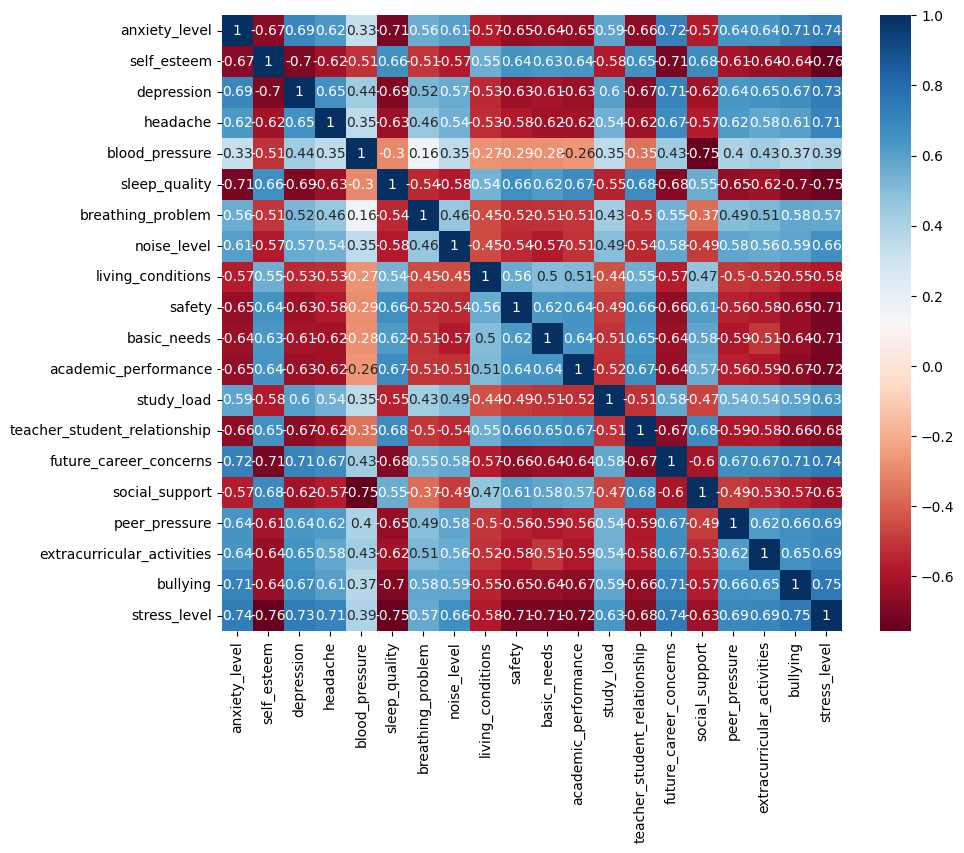

In [21]:
student_drop = student.corr()
plt.figure(figsize=(10,8))
sns.heatmap(student_drop,annot=True,cmap = 'RdBu')
plt.show()

In [22]:
student.drop(filter_high_colmns[0],inplace=True,axis=1)

# **Training Dataset**

In [23]:
X_data = student.loc[:,student.keys()[:-1]]
Y_data = student.loc[:,student.keys()[-1]]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,test_size=0.3,random_state=1,stratify=Y_data)

In [25]:
print("Original dataset:",student.shape)
print("Data for Training: ",X_train.shape)
print("Data for Testing: ",X_test.shape)

Original dataset: (1100, 19)
Data for Training:  (770, 18)
Data for Testing:  (330, 18)


# **Feature Scaling**

#### Effect of MinMaxScaler on accuracy

In [27]:
# scaler = MinMaxScaler()
# scaler.fit(X_train)

In [28]:
# X_train_scaled = scaler.transform(X_train)

In [29]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 anxiety_level                   0.0
self_esteem                     0.0
depression                      0.0
headache                        0.0
blood_pressure                  1.0
sleep_quality                   0.0
breathing_problem               0.0
noise_level                     0.0
living_conditions               0.0
safety                          0.0
basic_needs                     0.0
academic_performance            0.0
study_load                      0.0
teacher_student_relationship    0.0
future_career_concerns          0.0
social_support                  0.0
peer_pressure                   0.0
extracurricular_activities      0.0
dtype: float64
per-feature maximum before scaling:
 anxiety_level                   21.0
self_esteem                     30.0
depression                      27.0
headache                         5.0
blood_pressure                   3.0
sleep_quality                    5.0
breathing_problem                5.0
nois

In [30]:
# print("per-feature minimum after scaling:\n {}".format(
#     X_train_scaled.min(axis=0)))
# print("per-feature maximum after scaling:\n {}".format(
#     X_train_scaled.max(axis=0)))

In [31]:
# X_test_scaled = scaler.transform(X_test)

In [32]:

# knn=KNeighborsClassifier()

# knn.fit(X_train,Y_train)

# print("Test set accuracy: {:.2f}".format(knn.score(X_test, Y_test)))

In [33]:
# # preprocessing using 0-1 scaling
# scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)

# X_test_scaled = scaler.fit_transform(X_test)

# #train
# knn.fit(X_train_scaled, Y_train)

# # scoring on the scaled test set
# print("Scaled test set accuracy: {:.2f}".format(
#     knn.score(X_test_scaled, Y_test)))

# Effect on accuracy using Standard Scaler

In [34]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

knn = KNeighborsClassifier()

knn.fit(X_train_scaled, Y_train)

print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled, Y_test)))


KNN test accuracy: 0.88


In [35]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [-1.83058064 -2.01391324 -1.64778344 -1.80761938 -1.41865959 -1.6982084
 -1.91485667 -2.02929326 -2.23967631 -1.95142334 -1.93113626 -1.94598872
 -2.00863607 -1.9124246  -1.74286069 -1.79861142 -1.90237237 -1.93729249]
per-feature maximum after scaling:
 [1.6193598  1.37587078 1.85466188 1.78427984 0.97164213 1.51619786
 1.60996723 1.77624939 2.25602431 1.63643715 1.56269579 1.57140873
 1.80836732 1.70745481 1.54475011 1.09671428 1.59196619 1.57097472]


# Data Training

In [36]:

class train_models :

    def __init__(self,name,model) :
        self.name = name
        self.take_model = model.fit(X_train,Y_train)
        self.train_accuracy = round(model.score(X_train,Y_train)*100,2)
        self.test_accuracy = round(model.score(X_test,Y_test)*100,2)
        self.prediction = model.predict(X_test)
        self.model_confusion_matrix = confusion_matrix(self.prediction, Y_test)
        self.model_accuracy_score = round(accuracy_score(self.prediction, Y_test)*100,2)
        self.class_report = classification_report(self.prediction,Y_test)
        self.plot_confusion_matrix = heatmap(self.model_confusion_matrix , cmap="Pastel1_r", xticklabels=['0' ,'1' ,'2'], yticklabels=['0' ,'1' ,'2'], annot=True)

    def printDetails(self) :
        return f"Training accuracy:{self.train_accuracy}%\nTesting accuracy:{self.test_accuracy}%\nAccuracy_score:{self.model_accuracy_score}%\nConfusion_matrix:\
        \n{self.model_confusion_matrix}\nClassification Report\n{self.class_report}\n{self.plot_confusion_matrix}"




********** Logistic Regression **********


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy:90.0%
Testing accuracy:89.39%
Accuracy_score:89.39%
Confusion_matrix:        
[[102   6   8]
 [  5  92   2]
 [  5   9 101]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       116
           1       0.86      0.93      0.89        99
           2       0.91      0.88      0.89       115

    accuracy                           0.89       330
   macro avg       0.89      0.90      0.89       330
weighted avg       0.90      0.89      0.89       330

Axes(0.125,0.11;0.62x0.77)


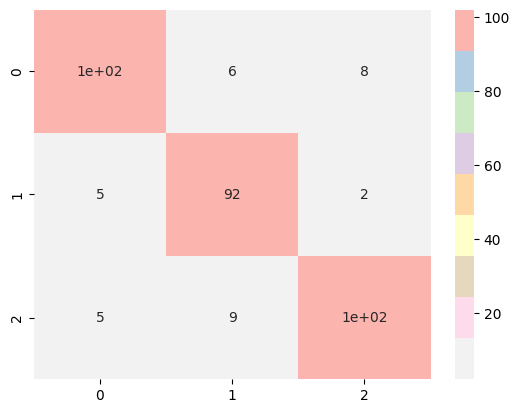

In [37]:
#driver code
print("********** Logistic Regression **********")
lr = train_models("Logistic Regression",LogisticRegression(max_iter=50))
print(lr.printDetails())


********** Naive Bayes **********
Training accuracy:87.92%
Testing accuracy:90.91%
Accuracy_score:90.91%
Confusion_matrix:        
[[101   5   2]
 [  0  90   0]
 [ 11  12 109]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       108
           1       0.84      1.00      0.91        90
           2       0.98      0.83      0.90       132

    accuracy                           0.91       330
   macro avg       0.91      0.92      0.91       330
weighted avg       0.92      0.91      0.91       330

Axes(0.125,0.11;0.62x0.77)


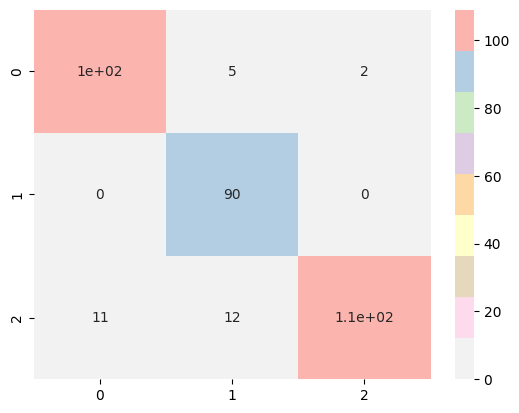

In [38]:
print("********** Naive Bayes **********")
gnb = train_models("Naive Bayes",GaussianNB())
print(gnb.printDetails())


********** Support Vector Machine **********
Training accuracy:91.17%
Testing accuracy:89.7%
Accuracy_score:89.7%
Confusion_matrix:        
[[103   5   5]
 [  2  94   7]
 [  7   8  99]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       113
           1       0.88      0.91      0.90       103
           2       0.89      0.87      0.88       114

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330

Axes(0.125,0.11;0.62x0.77)


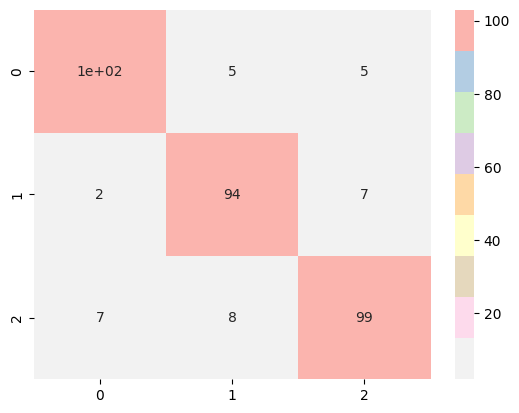

In [39]:
print("********** Support Vector Machine **********")
svc = train_models("Support Vector Machine",SVC(kernel="linear"))
print(svc.printDetails())


********** Random Forest  **********
Training accuracy:100.0%
Testing accuracy:88.18%
Accuracy_score:88.18%
Confusion_matrix:        
[[103  10   9]
 [  1  90   4]
 [  8   7  98]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       122
           1       0.84      0.95      0.89        95
           2       0.88      0.87      0.88       113

    accuracy                           0.88       330
   macro avg       0.88      0.89      0.88       330
weighted avg       0.88      0.88      0.88       330

Axes(0.125,0.11;0.62x0.77)


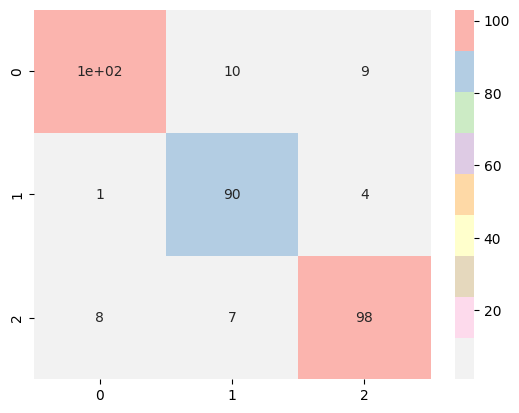

In [40]:
print("********** Random Forest  **********")
rfc = train_models("Random Forest",RandomForestClassifier(n_estimators=50))
print(rfc.printDetails())


********** Knn-Neighbours **********
Training accuracy:90.26%
Testing accuracy:88.79%
Accuracy_score:88.79%
Confusion_matrix:        
[[103   5   6]
 [  6  93   8]
 [  3   9  97]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       114
           1       0.87      0.87      0.87       107
           2       0.87      0.89      0.88       109

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330

Axes(0.125,0.11;0.62x0.77)


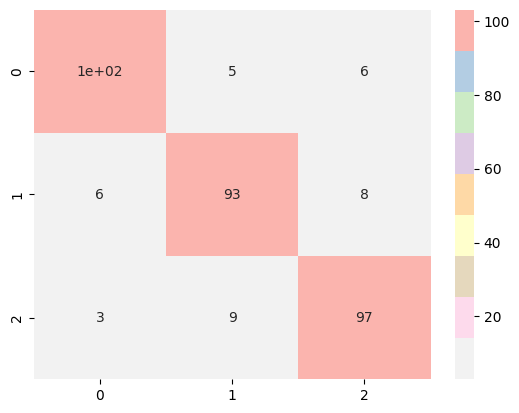

In [41]:
print("********** Knn-Neighbours **********")
knn = train_models("KNN",KNeighborsClassifier(n_neighbors=5))
print(knn.printDetails())

In [42]:


model_name = [lr.name,gnb.name,svc.name,rfc.name,knn.name]
model_accuracy_score = [lr.model_accuracy_score,gnb.model_accuracy_score,svc.model_accuracy_score,rfc.model_accuracy_score,knn.model_accuracy_score]
color_list = ["lightcoral", "lightsalmon", "lightgreen", "lightblue", "lightpink"]



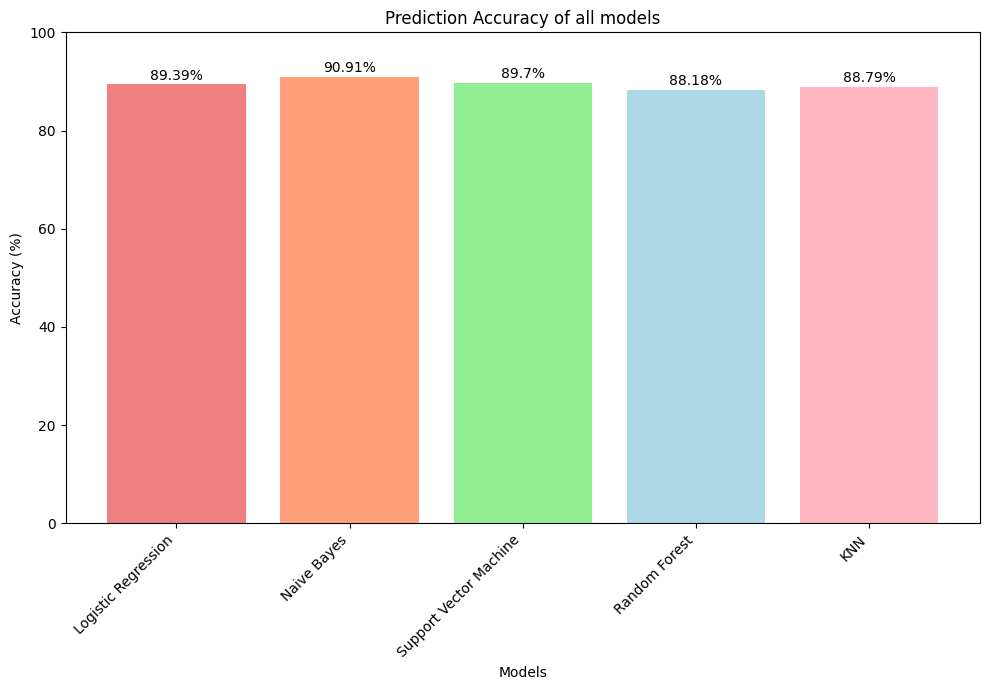

In [43]:


plt.figure(figsize=(10, 7))
plot_bar = plt.bar(model_name, model_accuracy_score, color=color_list)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Prediction Accuracy of all models')
plt.ylim(0, 100)

for bar, acc in zip(plot_bar, model_accuracy_score):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(acc) + '%', ha='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


